In [1]:
#import all necessary packages
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
url = 'http://bayesian-bandit.adludio.com/'
r = requests.post(url +'dump_bandit_data', 
    json={'item_group_id_list': [ 'pace1ha', 'uwyvrja', '36b7iyw' ] } )
parsed = json.loads(r.content)
df = pd.DataFrame(parsed['bandit_data']).sort_values('date').reset_index(drop=True).drop(columns='id')
df

,item_id,item_group_id,date,created_at,num_success,num_trials,num_engagements,num_impressions,num_clickthroughs,daily_spend,revenue
0,i4li3e7,uwyvrja,2020-09-23,2021-02-01 18:54:31,11,56,11,56,1,0.32,4.40
1,f755tsf,uwyvrja,2020-09-23,2021-02-01 18:54:32,9,60,9,60,0,0.37,3.60
2,pwix0yl,uwyvrja,2020-09-23,2021-02-01 18:54:31,12,77,12,77,1,0.56,4.80
3,cbr81rt,uwyvrja,2020-09-23,2021-02-01 18:54:31,5,45,5,45,1,0.25,2.00
4,52nuiyr,uwyvrja,2020-09-23,2021-02-01 18:54:31,10,44,10,44,0,0.25,4.00
...,...,...,...,...,...,...,...,...,...,...,...
547,0yyr8tx,36b7iyw,2020-12-14,2021-02-01 18:55:19,1502,9732,1502,9732,71,105.47,375.50
548,pjiwct6,36b7iyw,2020-12-15,2021-02-01 18:55:19,993,6077,993,6077,67,66.08,248.25
549,0yyr8tx,36b7iyw,2020-12-15,2021-02-01 18:55:19,1399,9620,1399,9620,64,104.60,349.75
550,0yyr8tx,36b7iyw,2020-12-16,2021-02-01 18:55:20,856,4523,856,4523,30,49.36,214.00


## Task 1

### Plot time evolutions of the engagement rate for all the different adgroups/item_ids within the selected campaign Id /item_group_id. Repeat the same for clickthrough rate and describe the plots

#### Aggregate data based on campaign id/item_group_id and date

In [5]:
dfg = df.groupby(['item_group_id','date']).agg({'num_success':'sum','num_trials':'sum','num_engagements':'sum',
                                                 'num_impressions':'sum','num_clickthroughs':'sum','daily_spend':'sum',
                                                 'revenue':'sum'}).reset_index()

#### Calculate and Add Engagement Rate and Click Through Rate

In [6]:
dfg['engagement_rate'] = dfg['num_engagements'] / dfg['num_impressions']
dfg['click_through_rate'] = dfg['num_clickthroughs'] / dfg['num_engagements']

In [7]:
# show top five row of the datatable
dfg.head()

,item_group_id,date,num_success,num_trials,num_engagements,num_impressions,num_clickthroughs,daily_spend,revenue,engagement_rate,click_through_rate
0,36b7iyw,2020-11-20,237,3694,237,3694,13,39.48,59.25,0.064158,0.054852
1,36b7iyw,2020-11-21,261,3698,261,3698,17,39.53,65.25,0.070579,0.065134
2,36b7iyw,2020-11-22,1003,3680,1003,3680,69,39.51,250.75,0.272554,0.068794
3,36b7iyw,2020-11-23,1921,6060,1921,6060,126,65.09,480.25,0.316997,0.065591
4,36b7iyw,2020-11-24,1509,6076,1509,6076,91,65.26,377.25,0.248354,0.060305


#### Create a dataframe for distinct campaign by selecting distict campaign

In [8]:
df_pace1ha = dfg[dfg['item_group_id']=='pace1ha']
df_uwyvrja = dfg[dfg['item_group_id']=='uwyvrja']
df_36b7iyw = dfg[dfg['item_group_id']=='36b7iyw']

In [9]:
#show top five row of aggregated data for specific campaign
df_pace1ha.head()

,item_group_id,date,num_success,num_trials,num_engagements,num_impressions,num_clickthroughs,daily_spend,revenue,engagement_rate,click_through_rate
27,pace1ha,2020-10-08,256,9051,256,9051,12,48.92,2.56,0.028284,0.046875
28,pace1ha,2020-10-09,1594,60657,1594,60657,60,352.66,15.94,0.026279,0.037641
29,pace1ha,2020-10-10,2694,101079,2694,101079,124,591.35,26.94,0.026652,0.046028
30,pace1ha,2020-10-11,1544,58815,1544,58815,54,343.92,15.44,0.026252,0.034974
31,pace1ha,2020-10-12,1008,35603,1008,35603,42,207.68,10.08,0.028312,0.041667


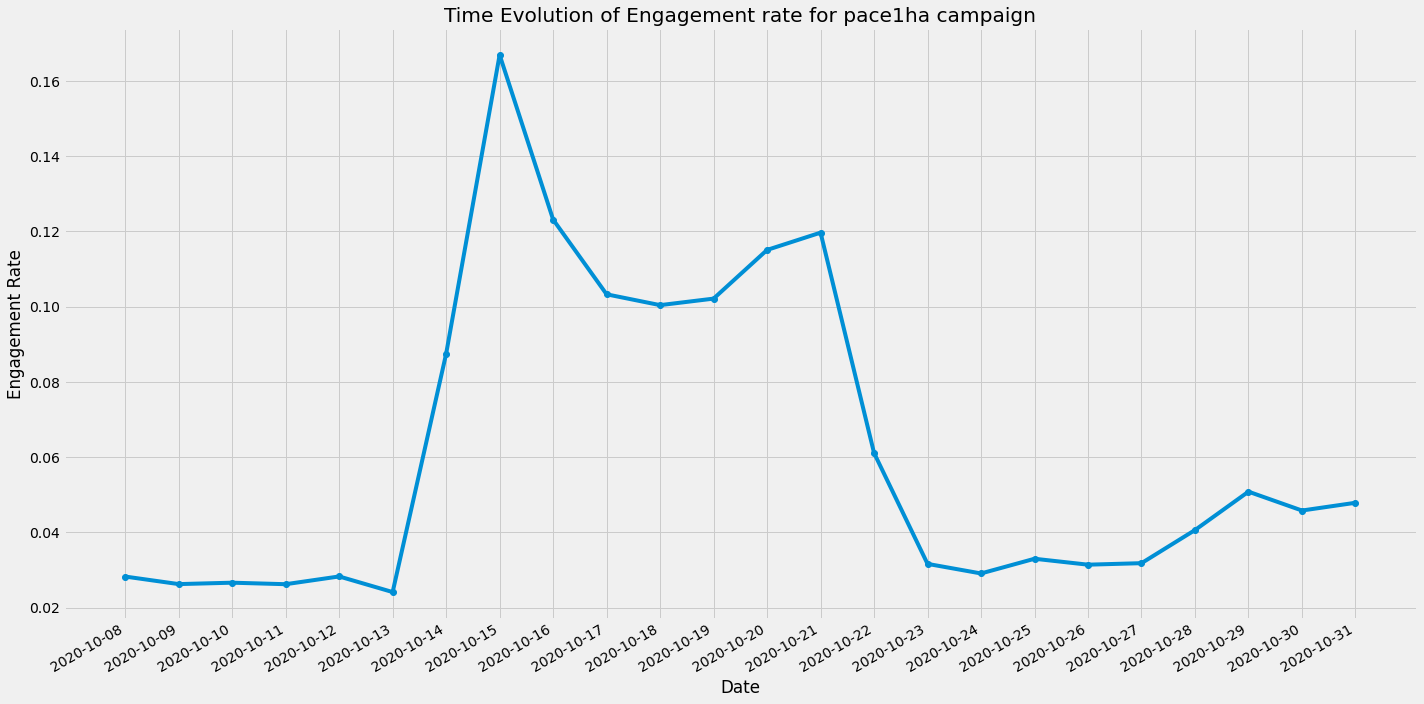

In [10]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))
plt.plot_date(df_pace1ha['date'],df_pace1ha['engagement_rate'],linestyle='solid')
plt.xlabel('Date')
plt.ylabel('Engagement Rate')
plt.title('Time Evolution of Engagement rate for pace1ha campaign')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

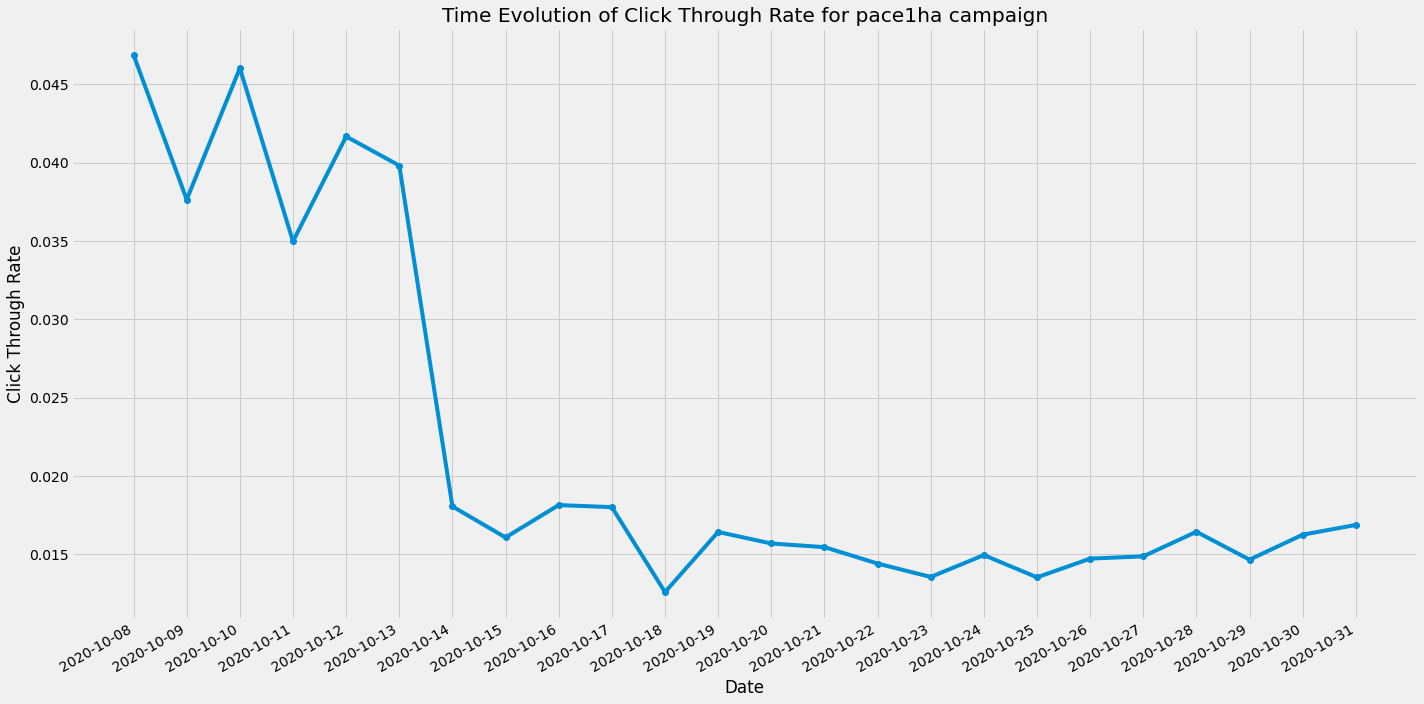

In [11]:
plt.figure(figsize=(20,10))
plt.plot_date(df_pace1ha['date'],df_pace1ha['click_through_rate'],linestyle='solid')
plt.xlabel('Date')
plt.ylabel('Click Through Rate')
plt.title('Time Evolution of Click Through Rate for pace1ha campaign')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

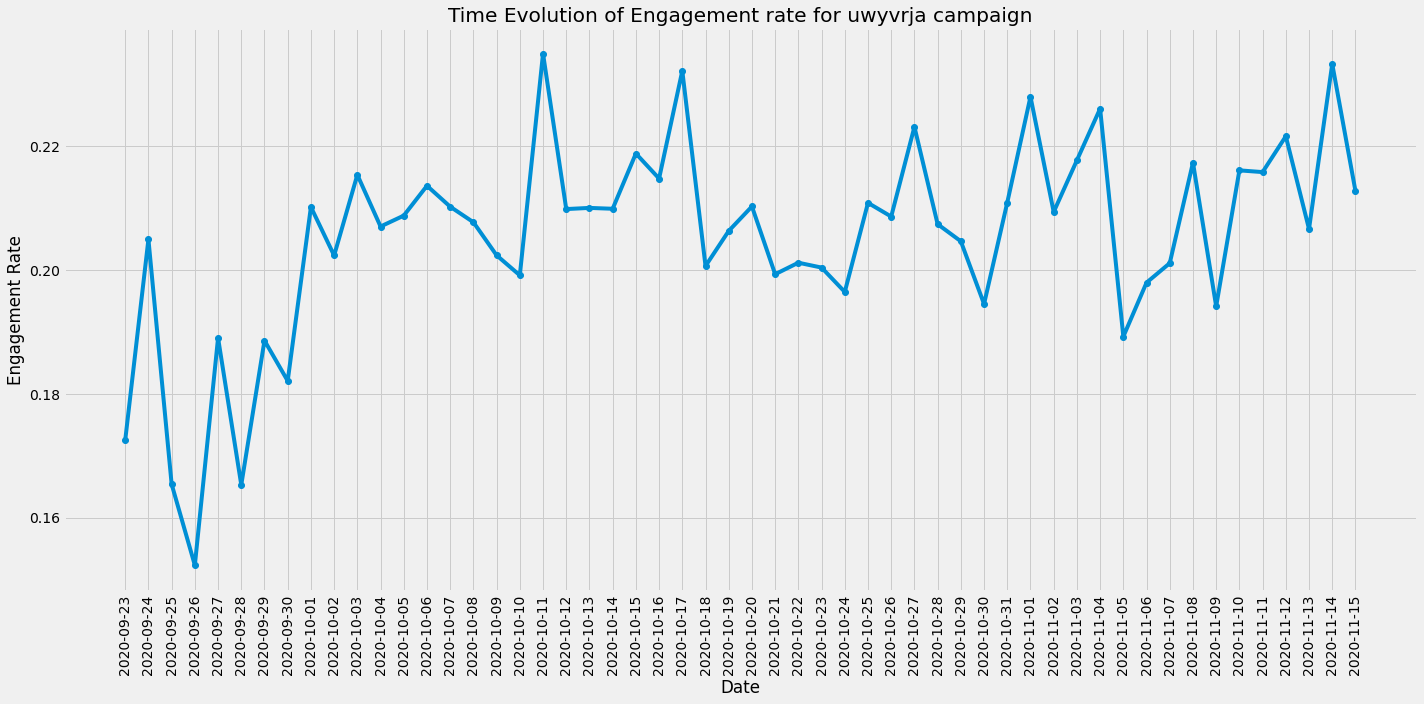

In [12]:
plt.figure(figsize=(20,10))
plt.plot_date(df_uwyvrja['date'],df_uwyvrja['engagement_rate'],linestyle='solid')
plt.xlabel('Date')
plt.ylabel('Engagement Rate')
plt.title('Time Evolution of Engagement rate for uwyvrja campaign')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

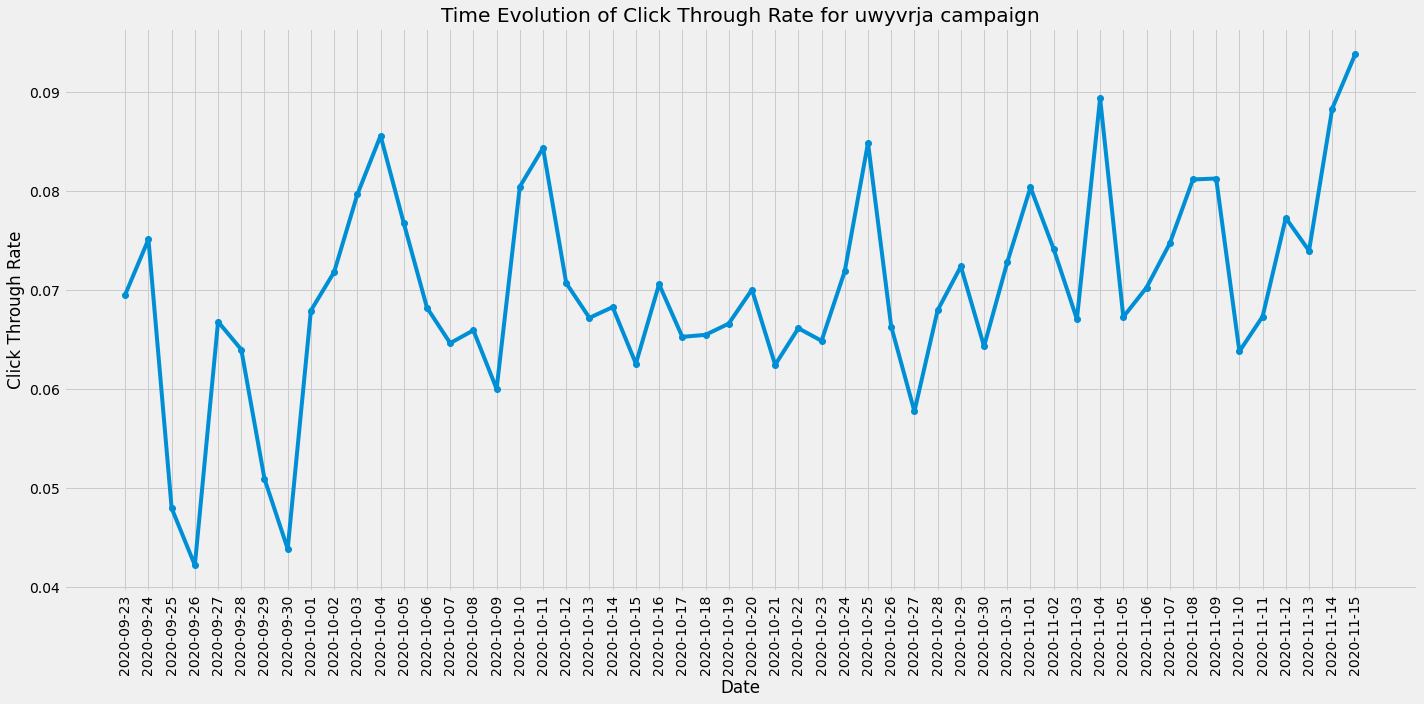

In [13]:
plt.figure(figsize=(20,10))
plt.plot_date(df_uwyvrja['date'],df_uwyvrja['click_through_rate'],linestyle='solid')
plt.xlabel('Date')
plt.ylabel('Click Through Rate')
plt.title('Time Evolution of Click Through Rate for uwyvrja campaign')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

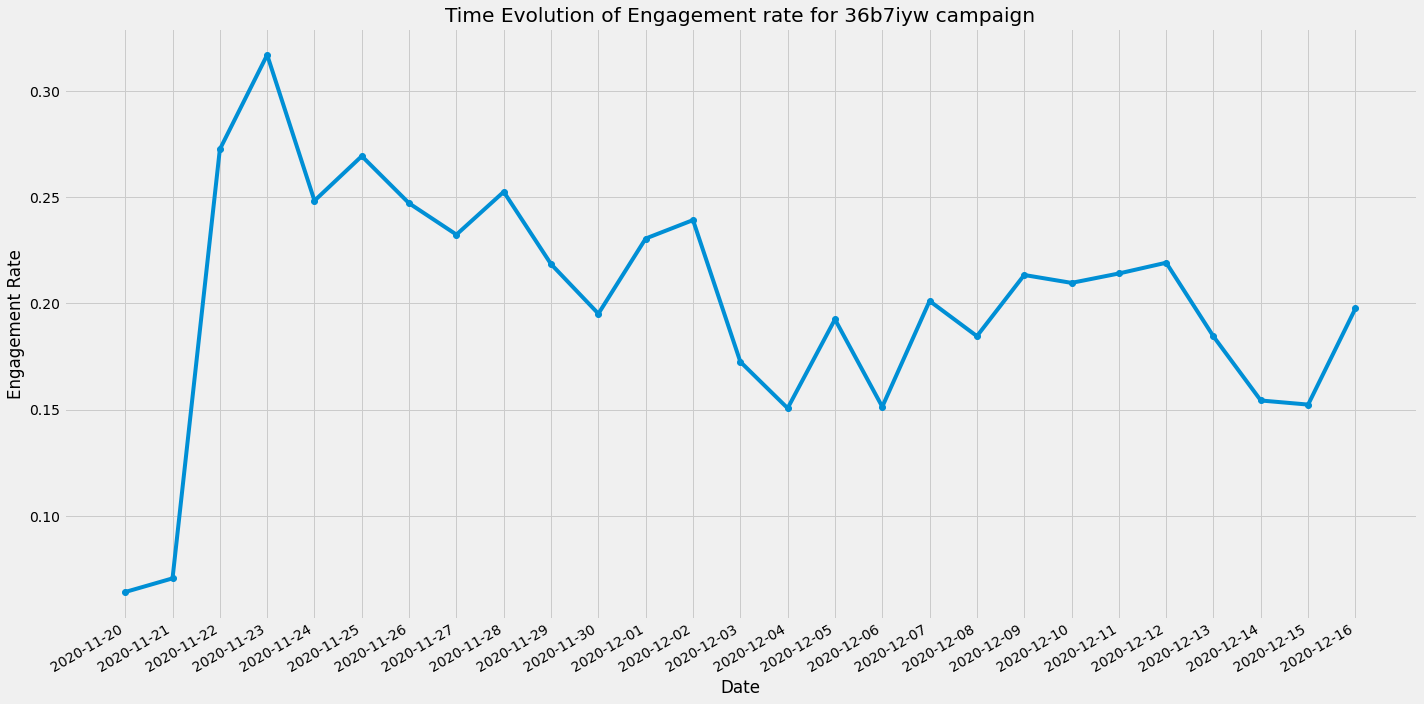

In [14]:
plt.figure(figsize=(20,10))
plt.plot_date(df_36b7iyw['date'],df_36b7iyw['engagement_rate'],linestyle='solid')
plt.xlabel('Date')
plt.ylabel('Engagement Rate')
plt.title('Time Evolution of Engagement rate for 36b7iyw campaign')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

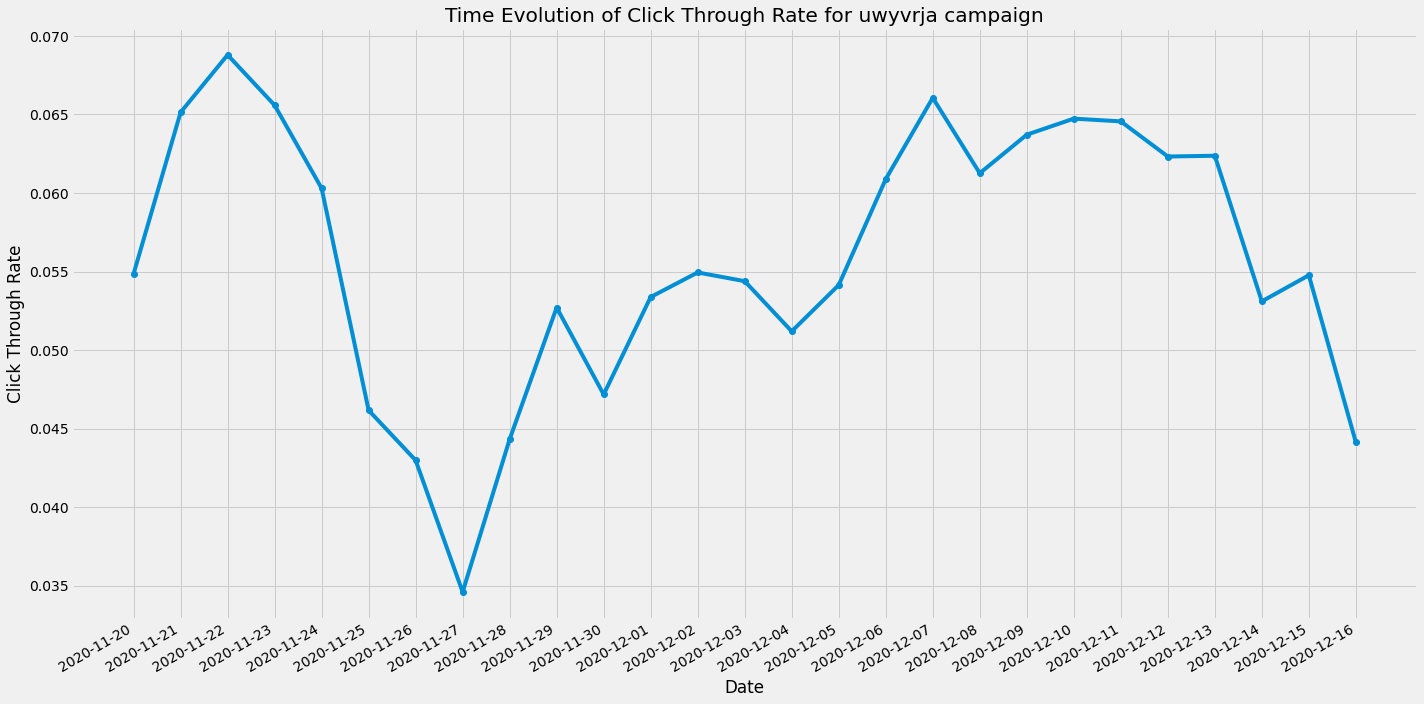

In [15]:
plt.figure(figsize=(20,10))
plt.plot_date(df_36b7iyw['date'],df_36b7iyw['click_through_rate'],linestyle='solid')
plt.xlabel('Date')
plt.ylabel('Click Through Rate')
plt.title('Time Evolution of Click Through Rate for uwyvrja campaign')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

## Task 2

Another piece of information we have is in the form of a csv file from TTD - the ad trade desk - the changes that were committed for each campaign and adgroup. It is inside the data directory of the repo.  
Primary key column contains both adgroup ids (item_id) and campaign id (item_group_id)
User column contains changes to the adgroup features -  using the algorithm api itself (called ‘ttd_api_ay6wyin@adludio.com’). Any other user belongs to one of the campaign managers.
Specifically, you’re expected to look at Adgroup/Adgroup flight changes with the column name ‘BudgetInAdvertiserCurrency’. And ofcourse, the datetime at which the changes were made. Ignore all other column entries.

We want you to explore both the daily aggregated data and the api changes response csv file, combine them in a way you see fit and present your findings  - for any evidence to see who (the campaign manager or the algorithm api) caused these budget changes and if any of these changes resulted in a performance change.

There is no right answer (yet), so feel free to explore whatever other parameter that may indicate any change


### Fetch all campaign data from the api

In [16]:
url = 'http://bayesian-bandit.adludio.com/'
r = requests.post(url +'dump_bandit_data', 
    json={'item_group_id_list': ['b5yn8r3', 's2dmtni', 'bwik4qv', '73t0r3u', 'wqgxoc1', 
                                 'u2t9dgi', 'uwyvrja', 'pace1ha', 'vf03dnt', '36b7iyw' ] } )
parsed = json.loads(r.content)
df = pd.DataFrame(parsed['bandit_data']).sort_values('date').reset_index(drop=True).drop(columns='id')

#### Aggregate data based on campaign id , date and item id and taking sum of all numerical columns

In [17]:
dfg = df.groupby(['item_group_id','date','item_id']).agg({'num_success':'sum','num_trials':'sum','num_engagements':'sum',
                                                 'num_impressions':'sum','num_clickthroughs':'sum','daily_spend':'sum',
                                                 'revenue':'sum'}).reset_index()

#### Calculate Engagement Rate and Click Through Rate

In [18]:
dfg['engagement_rate'] = dfg['num_engagements'] / dfg['num_impressions']
dfg['click_through_rate'] = dfg['num_clickthroughs'] / dfg['num_engagements']

#### Read Adludio Change History data

In [19]:
#read Adludio history data
ttd_data = pd.read_csv('../data/GLOBAL-461053 Adludio History 2021-02-26.csv')

In [20]:
ttd_data.head()

,modifiedon,user,table,column,OldValue,NewValue,primarykey,secondarykey,modifiedby,source
0,2021-02-19 15:32:05.1885877,angela.yu@adludio.com,CampaignFlight,EndDateExclusiveUTC,2021-02-23T04:59:00,2021-02-22T04:59:00,rf33gwg,2023334,ttd_api,.Net SqlClient Data Provider
1,2021-02-18 01:51:18.8845678,angela.yu@adludio.com,CampaignFlight,EndDateExclusiveUTC,2021-03-01T04:59:00,2021-02-23T04:59:00,rf33gwg,2023334,ttd_api,.Net SqlClient Data Provider
2,2021-02-12 17:15:49.9365387,angela.yu@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,2980.000000,3874.000000,gehehl7,2037170,ttd_api,.Net SqlClient Data Provider
3,2021-02-12 17:15:49.9365387,angela.yu@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,2980.000000,2086.000000,oropida,2037170,ttd_api,.Net SqlClient Data Provider
4,2021-02-12 17:15:49.9209108,angela.yu@adludio.com,AdGroup,BudgetInAdvertiserCurrency,6476.920000,7370.920000,gehehl7,(null),ttd_api,.Net SqlClient Data Provider


#### Filter necessary column entries and ignoring the rest

In [21]:
# filter table column with AdGroup/AdGroupFlight and column of BudgetInAdvertiserCurrency
ttd_data= ttd_data[ttd_data.table.isin(['AdGroup','AdGroupFlight']) & (ttd_data['column'] == 'BudgetInAdvertiserCurrency')]

In [22]:
ttd_data.head()

,modifiedon,user,table,column,OldValue,NewValue,primarykey,secondarykey,modifiedby,source
2,2021-02-12 17:15:49.9365387,angela.yu@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,2980.000000,3874.000000,gehehl7,2037170,ttd_api,.Net SqlClient Data Provider
3,2021-02-12 17:15:49.9365387,angela.yu@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,2980.000000,2086.000000,oropida,2037170,ttd_api,.Net SqlClient Data Provider
4,2021-02-12 17:15:49.9209108,angela.yu@adludio.com,AdGroup,BudgetInAdvertiserCurrency,6476.920000,7370.920000,gehehl7,(null),ttd_api,.Net SqlClient Data Provider
5,2021-02-12 17:15:49.9209108,angela.yu@adludio.com,AdGroup,BudgetInAdvertiserCurrency,13360.890000,12466.890000,oropida,(null),ttd_api,.Net SqlClient Data Provider
18,2021-02-11 12:23:11.9851841,ttd_api_ay6wyin@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,913.000000,1272.657729,gq012j8,2023334,ttd_publicapi,.Net SqlClient Data Provider


In [23]:
#shape of the data
ttd_data.shape

(578, 10)

In [24]:
#data info
ttd_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 2 to 3006
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   modifiedon    578 non-null    object
 1   user          578 non-null    object
 2   table         578 non-null    object
 3   column        578 non-null    object
 4   OldValue      578 non-null    object
 5   NewValue      578 non-null    object
 6   primarykey    578 non-null    object
 7   secondarykey  578 non-null    object
 8   modifiedby    578 non-null    object
 9   source        578 non-null    object
dtypes: object(10)
memory usage: 49.7+ KB


In [25]:
#change object data type to datetime for modifiedon in ttd_data and created_at in df
ttd_data['modifiedon_date'] = ttd_data['modifiedon'].astype('datetime64[s]').dt.date
dfg['date'] = dfg['date'].astype('datetime64[s]').dt.date

In [26]:
# ttd_data.head()

#### Merge data based on date,item_id for data from api and modefiedon_date, primarykey for ttd history data 

In [27]:
merged_data= pd.merge(dfg, ttd_data,left_on=['date','item_id'],right_on=['modifiedon_date','primarykey'],how='inner')

In [28]:
merged_data.head()

,item_group_id,date,item_id,num_success,num_trials,num_engagements,num_impressions,num_clickthroughs,daily_spend,revenue,...,user,table,column,OldValue,NewValue,primarykey,secondarykey,modifiedby,source,modifiedon_date
0,36b7iyw,2020-11-20,0yyr8tx,226,3642,226,3642,13,38.92,56.5,...,mauricio.oliveira@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,5000.000000,1250.000000,0yyr8tx,1867684,ttd_api,.Net SqlClient Data Provider,2020-11-20
1,36b7iyw,2020-11-20,0yyr8tx,226,3642,226,3642,13,38.92,56.5,...,mauricio.oliveira@adludio.com,AdGroup,BudgetInAdvertiserCurrency,5000.000000,1250.000000,0yyr8tx,(null),ttd_api,.Net SqlClient Data Provider,2020-11-20
2,36b7iyw,2020-11-20,0yyr8tx,226,3642,226,3642,13,38.92,56.5,...,ttd_api_ay6wyin@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,(null),5000.000000,0yyr8tx,1867684,ttd_publicapi,.Net SqlClient Data Provider,2020-11-20
3,36b7iyw,2020-11-20,0yyr8tx,226,3642,226,3642,13,38.92,56.5,...,ttd_api_ay6wyin@adludio.com,AdGroup,BudgetInAdvertiserCurrency,0.000000,5000.000000,0yyr8tx,(null),ttd_publicapi,.Net SqlClient Data Provider,2020-11-20
4,36b7iyw,2020-11-20,0yyr8tx,226,3642,226,3642,13,38.92,56.5,...,ttd_api_ay6wyin@adludio.com,AdGroup,BudgetInAdvertiserCurrency,(null),0.000000,0yyr8tx,(null),ttd_publicapi,.Net SqlClient Data Provider,2020-11-20


In [29]:
merged_data.shape

(325, 23)

In [30]:
merged_data['modifiedon'].value_counts()

2020-09-30 09:09:45.8230000    7
2020-09-23 20:13:31.5130000    7
2020-09-30 09:09:45.8300000    7
2020-09-23 08:49:36.5170000    7
2020-09-24 12:37:11.1800000    7
                              ..
2020-09-26 07:47:44.9430000    1
2020-09-23 03:34:50.2670000    1
2020-09-18 08:38:42.8900000    1
2020-09-15 08:06:13.1130000    1
2020-09-04 15:00:43.9100000    1
Name: modifiedon, Length: 218, dtype: int64

#### Sort merged data by modifiedon

In [31]:
merged_data = merged_data.sort_values('modifiedon').reset_index(drop=True)

In [32]:
merged_data.head(3)

,item_group_id,date,item_id,num_success,num_trials,num_engagements,num_impressions,num_clickthroughs,daily_spend,revenue,...,user,table,column,OldValue,NewValue,primarykey,secondarykey,modifiedby,source,modifiedon_date
0,wqgxoc1,2020-08-30,unwvpjo,306,1508,306,1508,38,9.99,39.78,...,abigail.gammell@adludio.com,AdGroup,BudgetInAdvertiserCurrency,150.000000,170.000000,unwvpjo,(null),ttd_api,.Net SqlClient Data Provider,2020-08-30
1,wqgxoc1,2020-08-30,unwvpjo,306,1508,306,1508,38,9.99,39.78,...,abigail.gammell@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,150.000000,170.000000,unwvpjo,1635300,ttd_api,.Net SqlClient Data Provider,2020-08-30
2,wqgxoc1,2020-08-30,s1gj6o7,223,1379,223,1379,28,6.53,28.99,...,abigail.gammell@adludio.com,AdGroup,BudgetInAdvertiserCurrency,30.000000,40.000000,s1gj6o7,(null),ttd_api,.Net SqlClient Data Provider,2020-08-30


In [33]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   item_group_id       325 non-null    object 
 1   date                325 non-null    object 
 2   item_id             325 non-null    object 
 3   num_success         325 non-null    int64  
 4   num_trials          325 non-null    int64  
 5   num_engagements     325 non-null    int64  
 6   num_impressions     325 non-null    int64  
 7   num_clickthroughs   325 non-null    int64  
 8   daily_spend         325 non-null    float64
 9   revenue             325 non-null    float64
 10  engagement_rate     325 non-null    float64
 11  click_through_rate  323 non-null    float64
 12  modifiedon          325 non-null    object 
 13  user                325 non-null    object 
 14  table               325 non-null    object 
 15  column              325 non-null    object 
 16  OldValue

## Changes that made by api

#### Select data only for changes made by the api and saving it in new dataframe

In [35]:
api_merged_data = merged_data[merged_data['user']=='ttd_api_ay6wyin@adludio.com']

In [36]:
api_merged_data['modifiedon_date'].value_counts()

2020-09-23    21
2020-10-08    15
2020-11-03    14
2020-10-12    14
2020-09-04    12
2020-11-20     6
2020-10-07     6
2020-09-28     4
2020-12-09     4
2020-09-11     3
Name: modifiedon_date, dtype: int64

In [37]:
api_merged_data.shape

(99, 23)

In [38]:
api_merged_data['OldValue'].value_counts()

(null)         30
0.000000       15
575.000000     14
2500.000000     4
750.000000      4
161.700000      2
569.800000      2
1068.200000     2
140.300000      2
601.500000      2
140.800000      2
582.400000      2
599.600000      2
152.200000      2
589.100000      2
774.500000      2
157.500000      2
490.300000      2
592.300000      2
147.500000      2
857.300000      2
Name: OldValue, dtype: int64

#### Change null value to 0

In [ ]:
api_merged_data['OldValue'] = api_merged_data['OldValue'].replace('(null)',0.000000)

#### Cast OldValue and NewValue column datatypes ot float64

In [ ]:
api_merged_data['OldValue'] = api_merged_data['OldValue'].astype('float64')
api_merged_data['NewValue'] = api_merged_data['NewValue'].astype('float64')

#### Aggregate data based on modifiedon_date column and summing data for one day

In [41]:
api_merged_data_g = api_merged_data.groupby(['modifiedon_date','item_group_id']).agg({'num_success':'sum','num_trials':'sum','num_engagements':'sum',
                                                 'num_impressions':'sum','num_clickthroughs':'sum','daily_spend':'sum',
                                                 'revenue':'sum','click_through_rate':'sum','engagement_rate':'sum','OldValue':'sum','NewValue':'sum'}).reset_index()

In [42]:
api_merged_data_g.shape

(11, 13)

#### Add new columns to keep track of if budget increased and budget change value

In [43]:
api_merged_data_g['budget_increased'] = api_merged_data_g.apply(lambda x: "Yes" if (x['NewValue'] - x['OldValue'] > 0) else "No",axis=1)


In [44]:
api_merged_data_g['budget_change'] = api_merged_data_g['NewValue'] - api_merged_data_g['OldValue']

In [45]:
api_merged_data_g[['NewValue','OldValue','budget_increased','budget_change']]

,NewValue,OldValue,budget_increased,budget_change
0,5400.000000,5400.0,No,-9.094947e-13
1,900.000000,900.0,No,0.000000e+00
2,1340.000000,0.0,Yes,1.340000e+03
3,21000.000000,0.0,Yes,2.100000e+04
4,2999.999998,3000.0,No,-2.000000e-06
5,900.000000,900.0,No,0.000000e+00
6,5000.000000,0.0,Yes,5.000000e+03
7,8050.000000,8050.0,Yes,1.818989e-12
8,8050.000000,8050.0,No,-2.728484e-12
9,20000.000000,0.0,Yes,2.000000e+04


### Plot of Performace Evalution of Changes made by API

#### Below plot shows the engagement rate when for when the api decreased and increased the budget(yes represent bugdet increased and no represent budged reduction)

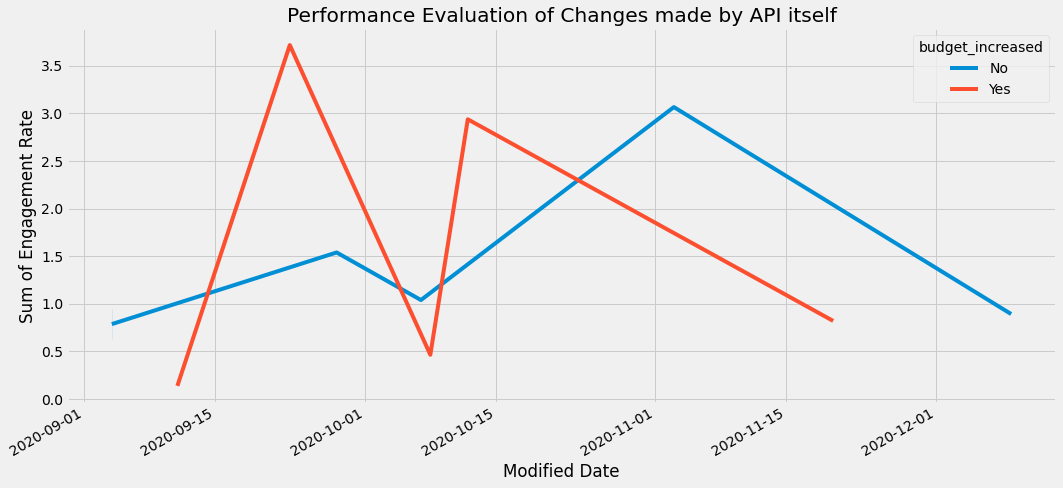

In [46]:
import seaborn as sns 
plt.figure(figsize=(15,7))
sns.lineplot(x='modifiedon_date',y='engagement_rate',hue='budget_increased',data=api_merged_data_g)
plt.xlabel('Modified Date')
plt.ylabel('Sum of Engagement Rate')
plt.title('Performance Evaluation of Changes made by API itself')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

### Plot of Relationship Between Engagement Rate and New Changed Value by API

#### Below plot shows the time series plot of Engagement Rate in blue line and Budget Value Change in red line to describe the impact of budget increase and decrease on engagement rate

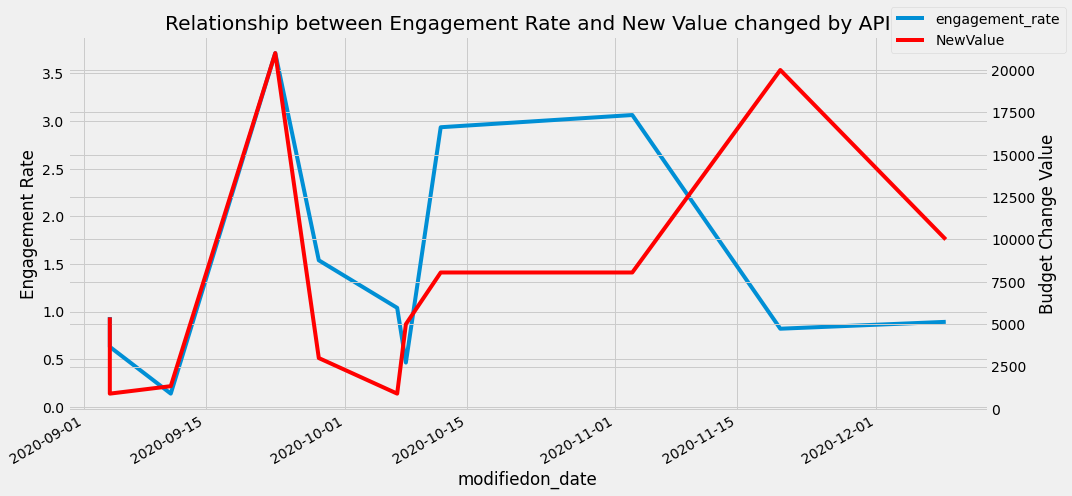

In [61]:
ax = api_merged_data_g.plot(x="modifiedon_date", y="engagement_rate", legend=False,figsize=(15, 7))
ax.set_title("Relationship between Engagement Rate and New Value changed by API")
ax.set_ylabel("Engagement Rate")
ax2 = ax.twinx()
ax2.set_ylabel("Budget Change Value")
api_merged_data_g.plot(x="modifiedon_date", y="NewValue", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

### Performance Evaluation of changes made by the API for each Campaign and Budget Change made by the API for each campaign

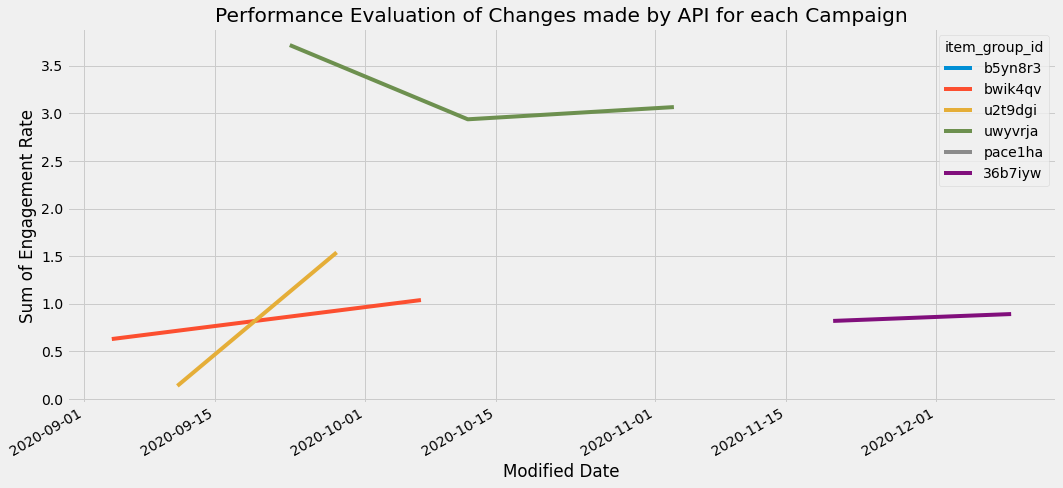

In [48]:
plt.figure(figsize=(15,7))
sns.lineplot(x='modifiedon_date',y='engagement_rate',hue='item_group_id',data=api_merged_data_g)
plt.xlabel('Modified Date')
plt.ylabel('Sum of Engagement Rate')
plt.title('Performance Evaluation of Changes made by API for each Campaign')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

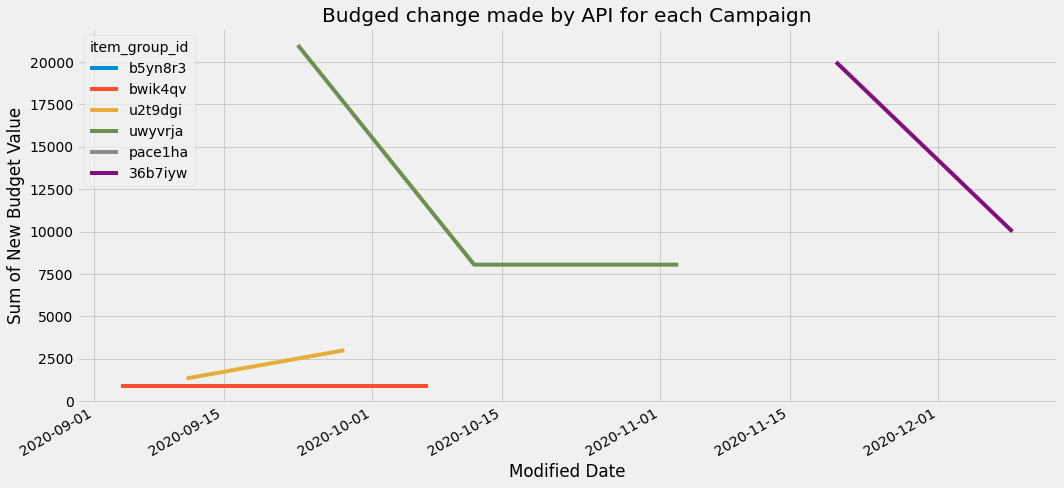

In [49]:
plt.figure(figsize=(15,7))
sns.lineplot(x='modifiedon_date',y='NewValue',hue='item_group_id',data=api_merged_data_g)
plt.xlabel('Modified Date')
plt.ylabel('Sum of New Budget Value')
plt.title('Budged change made by API for each Campaign')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

### As we can see from above the changes made by API is directly impacting the performance which is measured by engagement rate.

### Plot of Budget Changes made by API

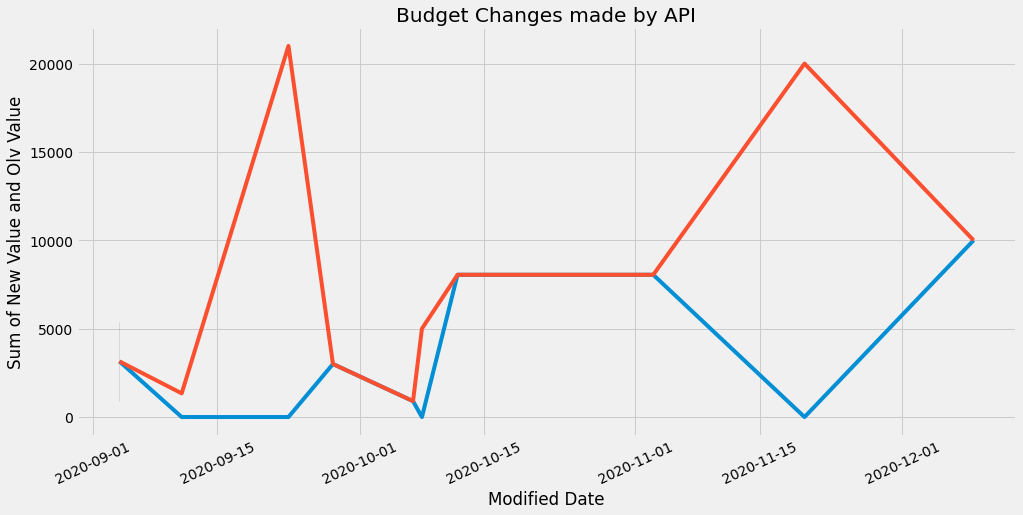

In [50]:
plt.figure(figsize=(15,7))
sns.lineplot(x = "modifiedon_date", y = "OldValue", data = api_merged_data_g) 
sns.lineplot(x = "modifiedon_date", y = "NewValue", data = api_merged_data_g) 
plt.xlabel('Modified Date')
plt.ylabel("Sum of New Value and Olv Value") 
plt.title('Budget Changes made by API')
plt.xticks(rotation = 25)
plt.show()

## Changes that made by Campaign Manager

#### Select data with only campaign manager

In [51]:
campaign_manager_merged_data = merged_data[merged_data['user']!='ttd_api_ay6wyin@adludio.com']

In [52]:
campaign_manager_merged_data['modifiedon_date'].value_counts()

2020-09-15    36
2020-09-23    28
2020-09-21    22
2020-09-16    20
2020-12-09    16
2020-09-17    14
2020-09-30    14
2020-09-24    14
2020-09-27    14
2020-10-15    10
2020-10-20     6
2020-09-18     6
2020-11-23     4
2020-10-26     4
2020-11-20     4
2020-12-12     4
2020-09-26     4
2020-08-30     4
2020-09-14     2
Name: modifiedon_date, dtype: int64

In [53]:
campaign_manager_merged_data.shape

(226, 23)

#### Replace Null value with 0

In [ ]:
campaign_manager_merged_data['OldValue'] = campaign_manager_merged_data['OldValue'].replace('(null)',0.000000)

#### Change OldValue and NewValue data to float

In [ ]:
campaign_manager_merged_data['OldValue'] = campaign_manager_merged_data['OldValue'].astype('float64')
campaign_manager_merged_data['NewValue'] = campaign_manager_merged_data['NewValue'].astype('float64')

#### Aggregate data based on modifiedon_date and sum values that exist in the same date

In [56]:
campaign_manager_merged_data_g = campaign_manager_merged_data.groupby(['modifiedon_date','item_group_id']).agg({'num_success':'sum','num_trials':'sum','num_engagements':'sum',
                                                 'num_impressions':'sum','num_clickthroughs':'sum','daily_spend':'sum',
                                                 'revenue':'sum','click_through_rate':'sum','engagement_rate':'sum','OldValue':'sum','NewValue':'sum'}).reset_index()

#### Add column that indicates budget increase and budget change value

In [57]:
campaign_manager_merged_data_g['budget_increased'] = campaign_manager_merged_data_g.apply(lambda x: "Yes" if (x['NewValue'] - x['OldValue'] > 0) else "No",axis=1)

In [58]:
campaign_manager_merged_data_g['budget_change'] = campaign_manager_merged_data_g['NewValue'] - campaign_manager_merged_data_g['OldValue']

In [59]:
campaign_manager_merged_data_g[['NewValue','OldValue','budget_increased','budget_change']]

,NewValue,OldValue,budget_increased,budget_change
0,420.0,360.000000,Yes,60.000000
1,1800.0,1340.000000,Yes,460.000000
2,9400.0,6900.000000,Yes,2500.000000
3,10000.0,6400.000000,Yes,3600.000000
4,6000.0,3400.000000,Yes,2600.000000
5,3800.0,4400.000000,No,-600.000000
6,5800.0,6000.000000,No,-200.000000
7,10200.0,9000.000000,Yes,1200.000000
8,5400.0,6000.000000,No,-600.000000
9,6400.0,7600.000000,No,-1200.000000


### Plot Performance Evaluation of changes made by Campaign Manager

#### Below plot shows the engagement rate when for when the api decreased and increased the budget(yes represent bugdet increased and no represent budged reduction)

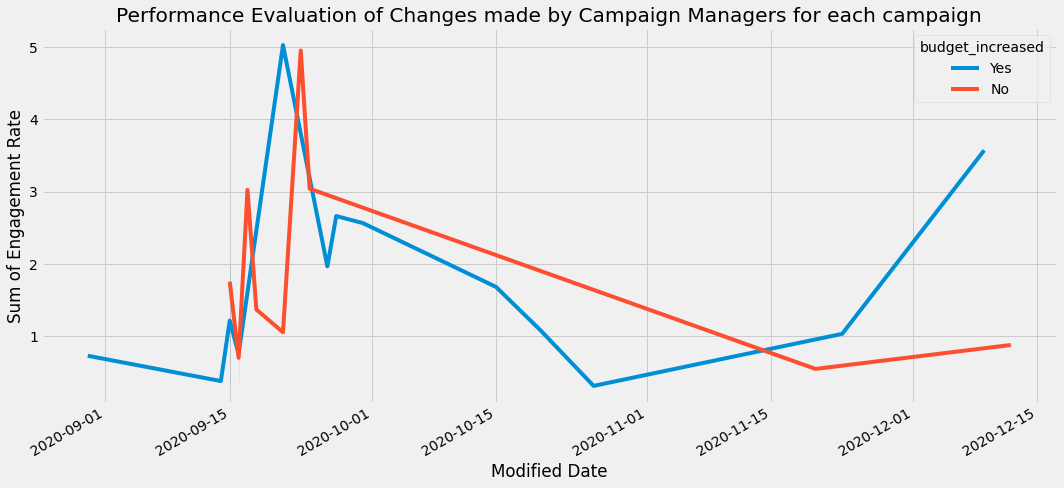

In [60]:
plt.figure(figsize=(15,7))
sns.lineplot(x='modifiedon_date',y='engagement_rate',hue='budget_increased',data=campaign_manager_merged_data_g)
plt.xlabel('Modified Date')
plt.ylabel('Sum of Engagement Rate')
plt.title('Performance Evaluation of Changes made by Campaign Managers for each campaign')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

### Plot of Relationship between Engagement Rate and New changed value by Campaign managers

#### Below plot shows the time series plot of Engagement Rate in blue line and Budget Value Change in red line to describe the impact of budget increase and decrease on engagement rate

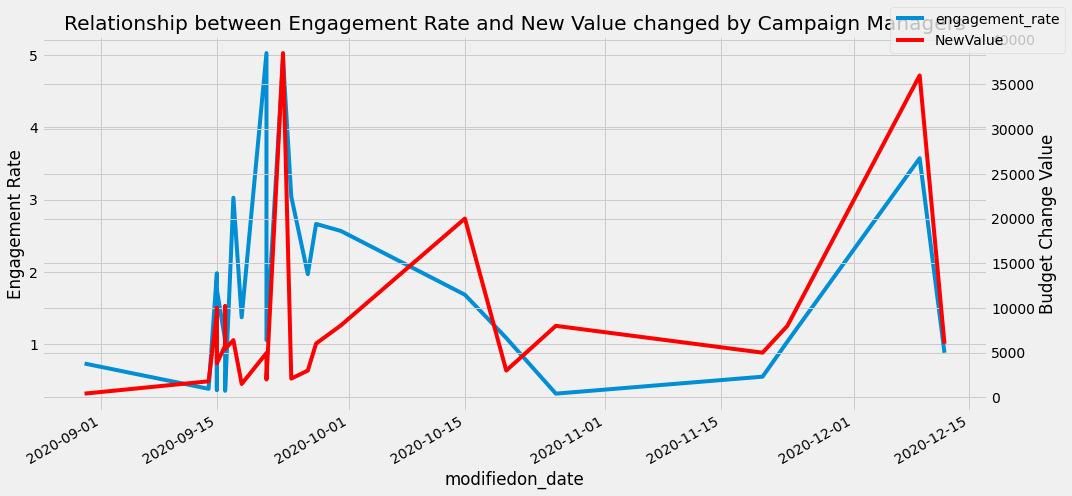

In [62]:
ax = campaign_manager_merged_data_g.plot(x="modifiedon_date", y="engagement_rate", legend=False,figsize=(15, 7))
ax.set_title("Relationship between Engagement Rate and New Value changed by Campaign Managers")
ax.set_ylabel("Engagement Rate")
ax2 = ax.twinx()
ax2.set_ylabel("Budget Change Value")
campaign_manager_merged_data_g.plot(x="modifiedon_date", y="NewValue", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

### Performance Evaluation of changes made by the Campaign managers for each Campaign and Budget Change made by the campaign Managers for each campaign

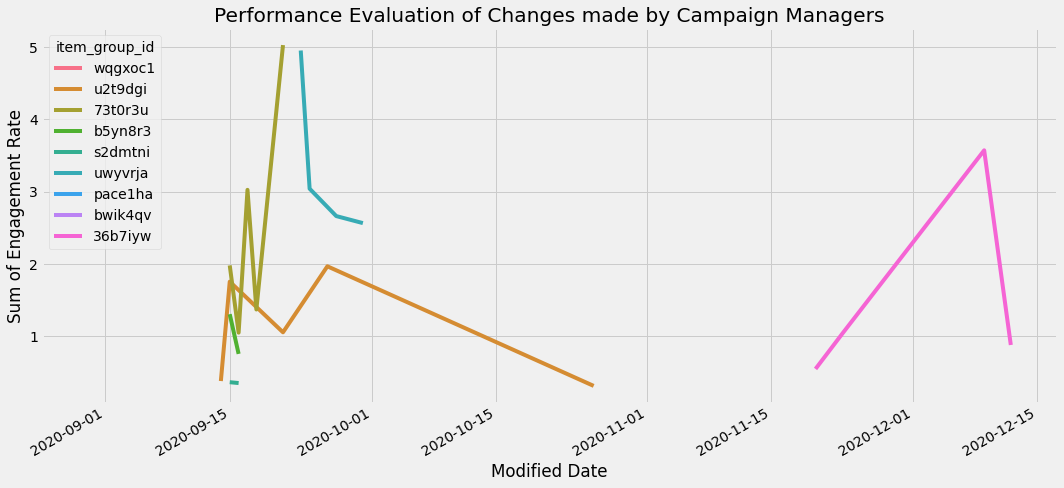

In [77]:
plt.figure(figsize=(15,7))
sns.lineplot(x='modifiedon_date',y='engagement_rate',hue='item_group_id',data=campaign_manager_merged_data_g)
plt.xlabel('Modified Date')
plt.ylabel('Sum of Engagement Rate')
plt.title('Performance Evaluation of Changes made by Campaign Managers')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

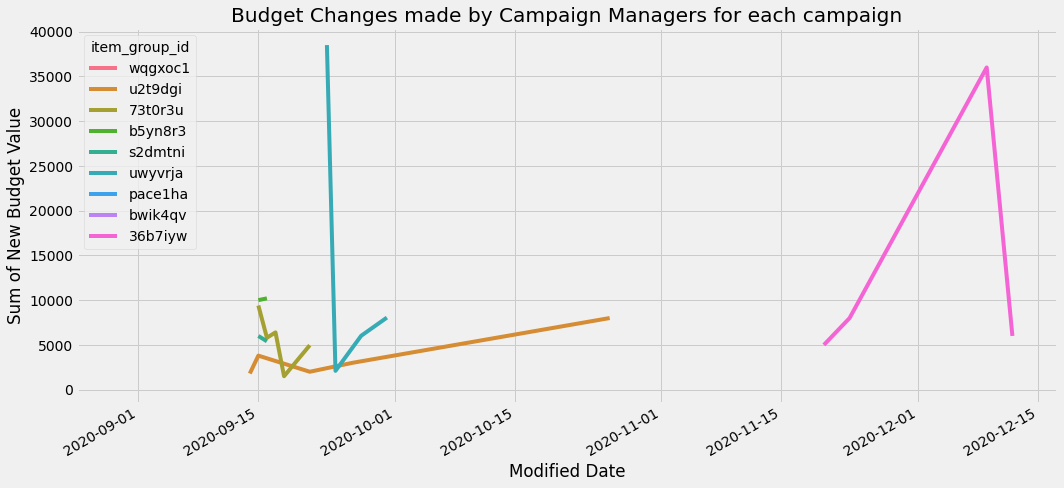

In [82]:
plt.figure(figsize=(15,7))
sns.lineplot(x='modifiedon_date',y='NewValue',hue='item_group_id',data=campaign_manager_merged_data_g)
plt.xlabel('Modified Date')
plt.ylabel('Sum of New Budget Value')
plt.title('Budget Changes made by Campaign Managers for each campaign')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

### As we can see from above the changes made by campaign managers is directly impacting the performance which is measured by engagement rate but for specifically for campaign u2t9dgi it is inversely impacting the performance

### Plot of Budget Changes made by Campaign Manager

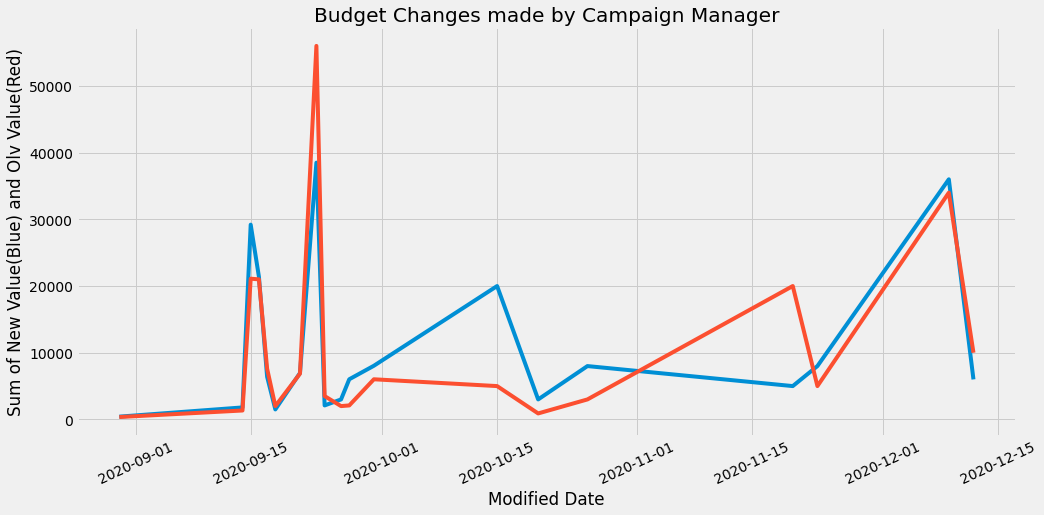

In [211]:
plt.figure(figsize=(15,7))
sns.lineplot(x = "modifiedon_date", y = "NewValue", data = campaign_manager_merged_data_g)
sns.lineplot(x = "modifiedon_date", y = "OldValue", data = campaign_manager_merged_data_g) 
plt.xlabel('Modified Date')
plt.ylabel("Sum of New Value(Blue) and Olv Value(Red)") 
plt.title('Budget Changes made by Campaign Manager')
plt.xticks(rotation = 25)
plt.show()